# EAD - Análise Exploratória de Dados
### Pós Graduação em Inteligência Artificial e Aprendizado de Máquina / PUC MINAS

Professor Leandro Figueira Lessa

Felipe Bochoski da Cruz - 1633227@sga.pucminas.br

Khalil Omar Salha - 1632515@sga.pucminas.br

Pedro Augusto de Morais - 1633121@sga.pucminas.br

Tuerê Pinto - 1453566@sga.pucminas.br

<br>
Turma: 2º Semestre 2025

# Título: Análise do Desenvolvimento Humano e Econômico Global com Base no Dataset Gapminder

# 1. Introdução

Este projeto  tem como objetivo realizar no mínimo 15 análises de dados, utilizando
visualizações, tabelas e representações gráficas para investigar o desenvolvimento humano
e econômico ao redor do mundo. As análises devem ser feitas com base no dataset
Gapminder, que contempla dados históricos, cujo objetivo é obter uma visão abrangente sobre padrões globais de crescimento, desigualdade, evolução populacional e qualidade de vida de países ao redor do mundo.

Ele será realizado em 5 etapas:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Introdução<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Coleta, Limpeza e Análise Exploratória (AED)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Funções de Visualização e Análise Gráfica<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Interpretação das Visualizações<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. Síntese dos Principais Insights<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. Conclusão e Reflexão<br>



# 2. Coleta, Limpeza e Análise Exploratória (AED)
Os dados utilizados neste projeto são provenientes do Gapminder, uma organização sem fins lucrativos que disponibiliza dados estatísticos sobre desenvolvimento global. O dataset inclui informações sobre expectativa de vida, PIB per capita e população de diversos países ao longo do tempo.

### Importação das bibliotecas necessárias no projeto

In [46]:
import sys
sys.path.append('../')
from src.datasets_reader import read_gapminder_data
from src.matplot_samples import plot_line_chart , scatter_subplots, plot_scatter_chart
from src.datasets_process import data_processing_clear, data_processing_clear_duplicates
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Leitura do arquivo da análise

In [47]:
df = read_gapminder_data('../datasets/gapminder_full.csv')

Arquivo ../datasets/gapminder_full.csv lido com sucesso.


### Exibe os primeiros 10 registros contidos no arquivo CSV

In [48]:
df.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


### Limpeza dos Dados

Prepararando os dados ausentes, tratando inconsistências e identificando padrões iniciais

In [49]:
# Analisando valores ausentes no DataFrame
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"\nTotal de linhas com valores ausentes: {df.isnull().any(axis=1).sum()}")

Valores ausentes por coluna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Total de linhas com valores ausentes: 0


Remoção das linhas com valores ausentes

In [50]:
df = data_processing_clear(df)

Valores ausentes por coluna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Total de linhas com valores ausentes: 0
Linhas com valores ausentes removidas com sucesso.


Prepararando os dados duplicados, tratando inconsistências e identificando padrões iniciais

In [51]:
# Analisar os dados duplicados
num_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {num_duplicados}")

Total de linhas duplicadas: 32


Visualizar os dados que estão duplicados

In [52]:
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

         country  year         pop continent  lifeExp     gdpPercap
9    Afghanistan  1997  22227415.0      Asia   41.763    635.341351
72   Afghanistan  1997  22227415.0      Asia   41.763    635.341351
120      Belgium  2007  10392226.0    Europe   79.441  33692.605080
140      Bolivia  1987   6156369.0  Americas   57.251   2753.691490
141      Bolivia  1992   6893451.0  Americas   59.957   2961.699694
..           ...   ...         ...       ...      ...           ...
644       Guinea  1952   2664249.0    Africa   33.609    510.196492
645       Guinea  1957   2876726.0    Africa   34.558    576.267025
646       Guinea  1962   3140003.0    Africa   35.753    686.373674
647       Guinea  1967   3451418.0    Africa   37.197    708.759541
648       Guinea  1972   3811387.0    Africa   38.842    741.666231

[64 rows x 6 columns]


Removendo registros duplicados

In [53]:
# Usando a função criada para limpar os dados duplicados
df = data_processing_clear_duplicates(df)

Total de linhas duplicadas: 32
Duplicatas por país e ano: 32
Linhas duplicadas removidas com sucesso.


In [54]:
# Novo arquivo de dataset limpo
df.to_csv('../datasets/gapminder_full_cleaned.csv', index=False)

In [55]:
# Leitura do novo arquivo limpo
df = read_gapminder_data('../datasets/gapminder_full_cleaned.csv')

Arquivo ../datasets/gapminder_full_cleaned.csv lido com sucesso.


### Analise Exploratória

In [57]:
df['year'].value_counts().sort_index()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

Insight Exploratório: Os dados estão disponíveis em intervalos de 5 anos, de 1952 a 2007.

In [59]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

Insight Exploratório: Africa é o continente com maior numero de paises representados.

In [72]:
print(f"Insight Exploratório: Expectativa de vida varia de {df['lifeExp'].min()}  a {df['lifeExp'].max()} anos")
print(f"Insight Exploratório: PIB Per Capita varia de  {df['gdpPercap'].min()}    a  {df['gdpPercap'].max()} dólares")
print(f"Insight Exploratório: Populacao varia de  {df['pop'].min()}    a  {df['pop'].max()} dólares")

Insight Exploratório: Expectativa de vida varia de 23.599  a 82.603 anos
Insight Exploratório: PIB Per Capita varia de  241.1658765    a  113523.1329 dólares
Insight Exploratório: Populacao varia de  60011.0    a  1318683096.0 dólares


### Visualizações Explorátorias

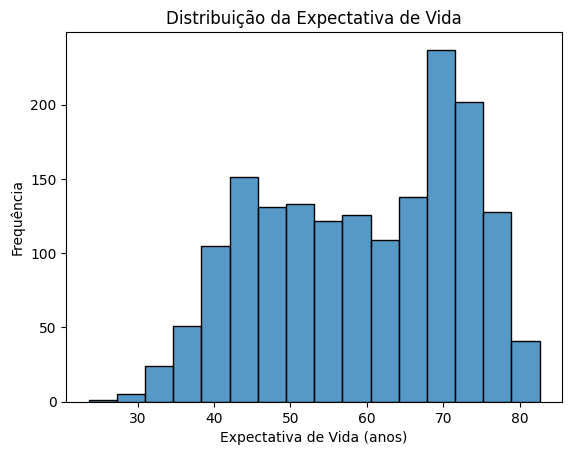

In [81]:
sns.histplot(df['lifeExp'])
plt.title('Distribuição da Expectativa de Vida')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Frequência')
plt.show()


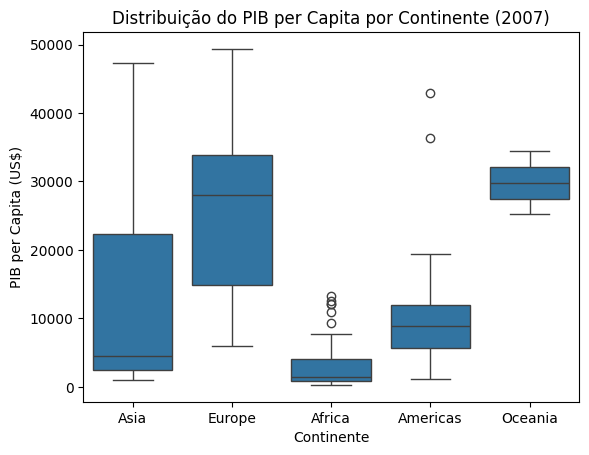

In [80]:
df_2007 = df[df['year'] == 2007]
sns.boxplot(data=df_2007, x='continent', y='gdpPercap')
plt.title('Distribuição do PIB per Capita por Continente (2007)')
plt.xlabel('Continente')
plt.ylabel('PIB per Capita (US$)')
plt.show()

In [93]:
life_expectancy_by_continent = df.groupby("continent")[["lifeExp", "gdpPercap"]].mean().reset_index()
life_expectancy_by_continent.columns = ["Continente", "Expectativa de Vida Média", "PIB per Capita Médio"]
print(life_expectancy_by_continent.sort_values(by="PIB per Capita Médio", ascending=False))

  Continente  Expectativa de Vida Média  PIB per Capita Médio
4    Oceania                  80.719500          29810.188275
3     Europe                  77.648600          25054.481636
2       Asia                  70.728485          12473.026870
1   Americas                  73.608120          11003.031625
0     Africa                  54.806038           3089.032605


In [89]:
df_pais_mais_lifeExp_2007 = df.where(df['year'] == 2007).sort_values(by='lifeExp', ascending=False).head(10)
df_pais_mais_lifeExp_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
803,Japan,Asia,2007,82.603,127467972,31656.06806,JPN,392
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,HKG,344
695,Iceland,Europe,2007,81.757,301931,36180.78919,ISL,352
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907,CHE,756
71,Australia,Oceania,2007,81.235,20434176,34435.36744,AUS,36
1427,Spain,Europe,2007,80.941,40448191,28821.06370,ESP,724
1475,Sweden,Europe,2007,80.884,9031088,33859.74835,SWE,752
767,Israel,Asia,2007,80.745,6426679,25523.27710,ISR,376
539,France,Europe,2007,80.657,61083916,30470.01670,FRA,250
251,Canada,Americas,2007,80.653,33390141,36319.23501,CAN,124


In [91]:
df_pais_mais_lifeExp_2007 = df.where(df['year'] == 2007).sort_values(by='lifeExp', ascending=False).head(10)
px.bar(df_pais_mais_lifeExp_2007, x='country', y='lifeExp', title='Países com maior expectativa de vida em 2007')

In [92]:
df_pais_mais_populoso_2007 = df.where(df['year'] == 2007).sort_values(by='pop', ascending=False).head(10)
px.bar(df_pais_mais_populoso_2007, x='country', y='pop', title='Países Mais Populosos em 2007')

# 3. Funções de Visualização e Análise Gráfica

Esta seção utiliza funções de visualização e análise gráfica do dataset Gapminder para interpretar indicadores como expectativa de vida, PIB per capita e população, permitindo compreender padrões, relações e desigualdades no desenvolvimento humano e econômico global.

##### Plotagem do Gráfico: Produto Interno Bruto Per Capita vs Expectativa de Vida Por Continente

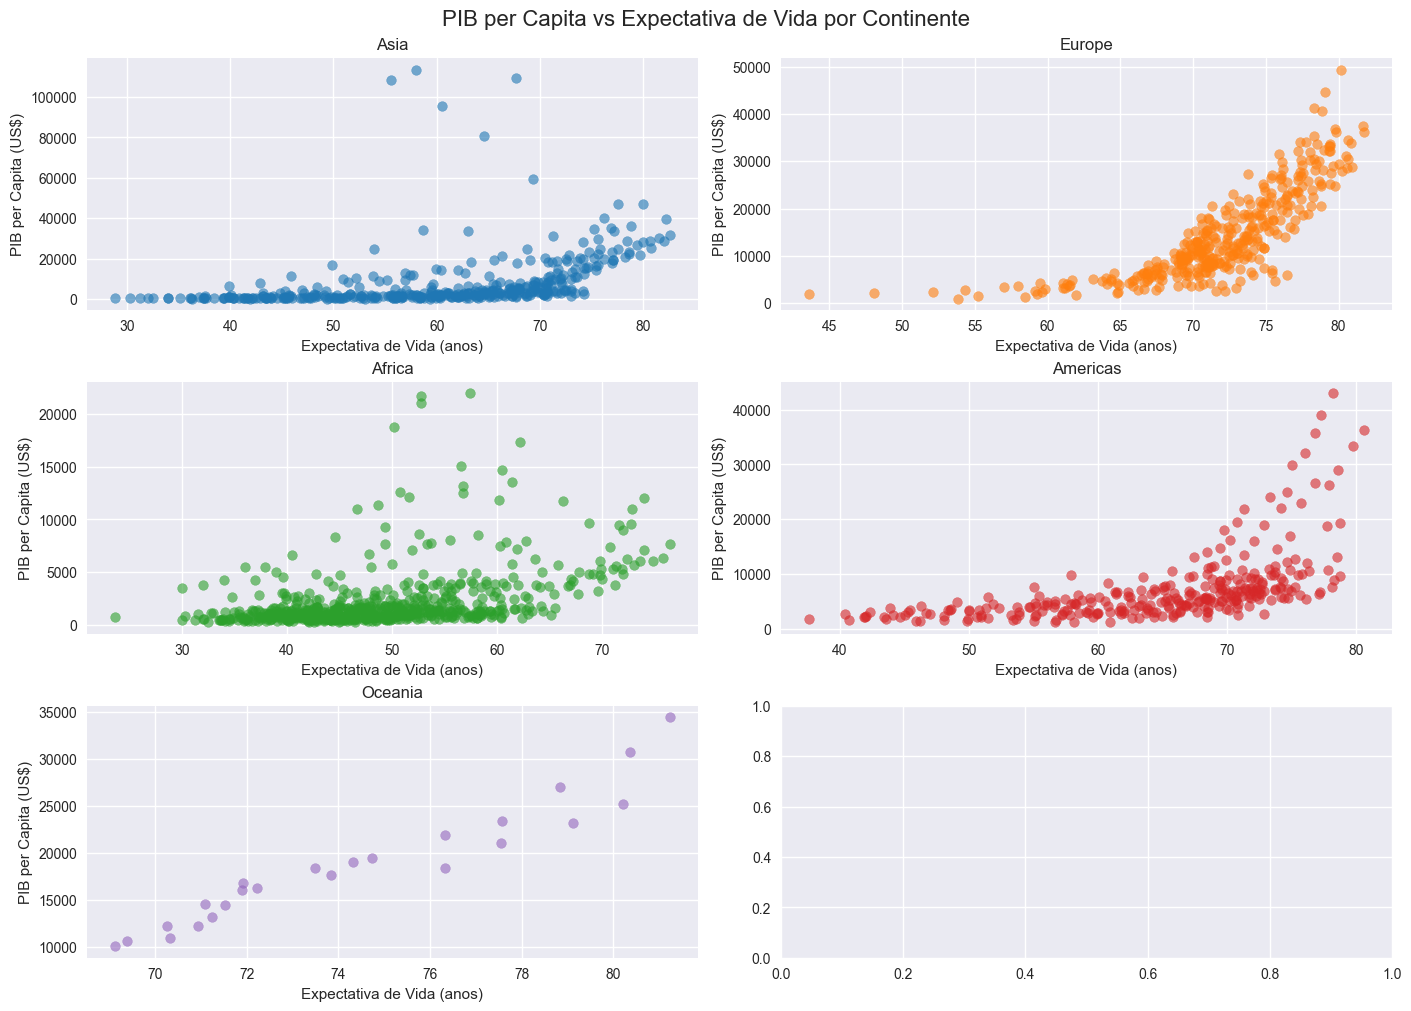

In [ ]:
continentsList = df['continent'].unique().tolist()
nRows = len(continentsList) - (len(continentsList) // 2 ) 

scatter_subplots(df, 
                'continent', 
                dfXColFieldName='lifeExp', 
                dfYColFieldName='gdpPercap',
                nRows=nRows, 
                nCols=2, 
                dataToAnalyze=continentsList, 
                xLabel='Expectativa de Vida (anos)', 
                yLabel='PIB per Capita (US$)',
                titulo_geral="PIB per Capita vs Expectativa de Vida por Continente",
                )

<p align="left">
  <b>Análise Gráfica: PIB per Capita vs Expectativa de Vida por Continente</b>
</p>

<p align="left">
<b>[Visão Geral]</b>

</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os gráficos de dispersão  acima apresentam um aumento da expectativa de vida conforme o Produto Interno Bruto Per Capita cresce. Os continentes com países mais ricos, tendem a ter pessoas com idades mais avançadas.</p>

<p>
<p align="left"><b>[Analise Entre Continentes]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Asia:</b> Há grande dispersão nos dados apresentados, indicando grandes diferenças economicas e támbem sociais no continente. Pode-se observar que o aumento do PIB Per Capita está associado ao aumento da expectativa de vida entre paises.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa:</b> Apresenta maior concentração de pontos, indicando menor desigualdade entre paises. A expectitiva de vida é forte e estável (65 - 80 anos), demostrando que quase toda as nações apresentam alta renda e longevidade.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Africa:</b>  O continente apresenta uma disparidade muito maior de riquezas entre paises e consequentemente a expectativa de vida. Mesmo paises com maior PIB, a expectativa de vida é menor do que os demais continentes.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>América:</b> Possui uma tendência de crescimento semelhante a Europa, mas com maior variação. Há um disparidade muito grande de renda entre paises e consequentemente a expectativa de vida.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Oceania:</b> Embora poucos pontos de comparação, o continente apresenta valores elevados do PIB e expectativa de vida com relação aos demais continentes; além de possuir um crescimento continuo que pode apresentar um alto padrão de desenvolvimento e desigualdade.</p>
</p>

<b>[Conclusão]</b>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os gráficos apresentam um padrão global consistente: quanto maior o PIB Per Capita, maior é a expectativa de vida.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Podemos concluir que a Europa e Oceania exibem rendas mais altas e expectativa de vida mais estáveis; a América e Ásia apresentam um crescimento mesmo com maior variação interna e a África com menor indice Per Capita do mundo, mas ainda sim, demostrando uma tendência positiva. Em resumo: o desenvolvimento economico está diretamente ligado à qualidade de vida, mas cada continente evolui com seus niveis de desigualdade próprios.</p>


----

#### Plotagem do Gráfico: Comparação da expectativa de vida entre continentes

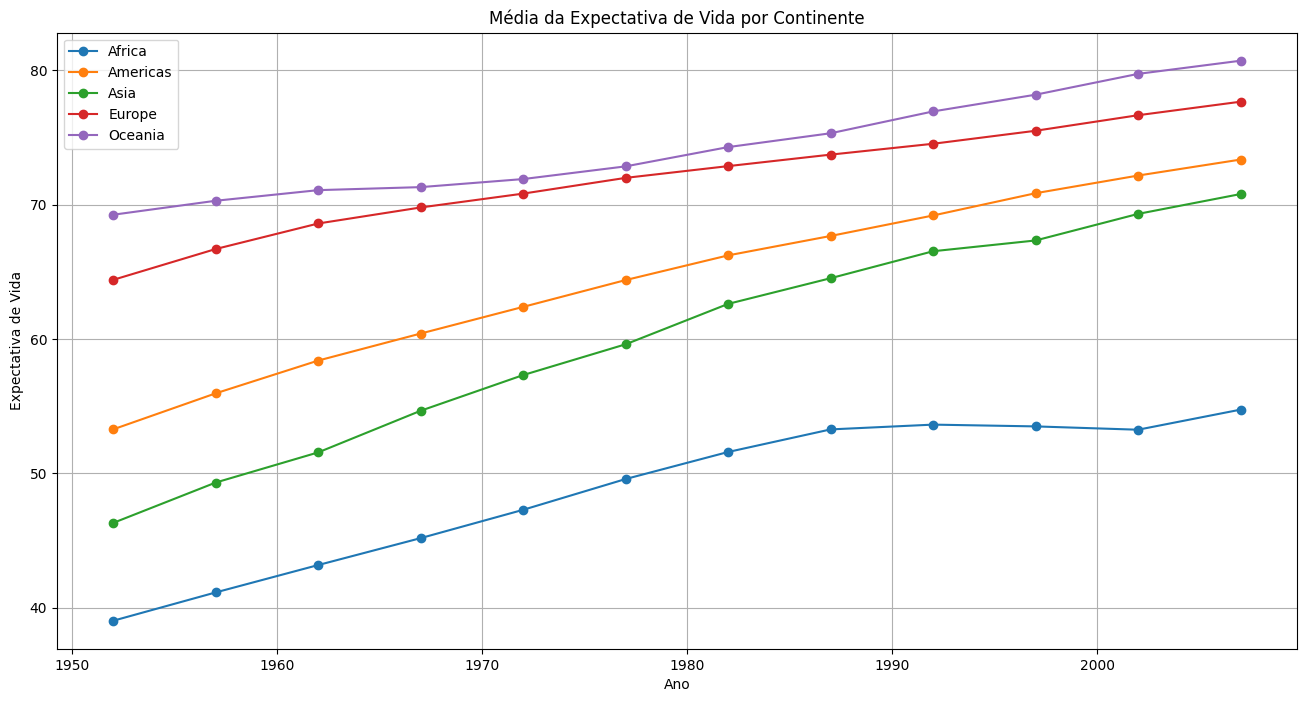

In [ ]:

group = df.groupby(['year', 'continent'])['lifeExp'].mean().unstack()


plot_line_chart(group=group, 
                title = "Média da Expectativa de Vida por Continente", 
                xLabel = "Ano", 
                yLabel = "Expectativa de Vida",
                showGrid = True,
                marker='o',
                xSize=16,
                ySize=8
                )



<p align="left">
  <b>Análise Gráfica: Comparação da expectativa de vida entre continentes</b>
</p>

[Visao Geral]

A análise gráfica da expectativa de vida (lifeExp) entre continentes mostra, de forma clara, que houve uma melhoria global constante entre 1952 e 2007.

Essa variável traduz a média de anos que uma pessoa pode esperar viver ao nascer e funciona como um importante indicador de qualidade de vida, refletindo avanços médicos, condições socioeconômicas e infraestrutura sanitária.

Durante esse período, observa-se uma tendência ascendente em todos os continentes, indicando progresso generalizado. Entretanto, níveis e ritmos de crescimento se diferenciam significativamente entre as regiões — revelando desigualdades globais persistentes no acesso a saúde, educação e desenvolvimento econômico.

O gráfico construído mostra visualmente essa dispar: a Europa e a Oceania consistentemente lideram, seguidas pelas Américas e pela Ásia, enquanto a África aparece abaixo da média mundial em praticamente todos os anos analisados.

[Análise Entre Continentes]

1. Europa e Oceania – níveis mais e crescimento sustentável
Europa e Oceania apresentaram, desde o início, os maiores valores de expectativa de vida, próximos dos 70 anos em 1952 e ultrapassando a marca de **80 anos em 2007

Esses resultados refletem décadas de estabilidade política, investimentos em saúde, saneamento e educação.

A evolução gráfica dessas regiões é caracterizada por um crescimento constante e linear, sem interrupções expressivas ao longo das décadas.

2. Américas – significativa e consolidação do bem-estar
As Américas partem de níveis intermediários (entre 50 e 68 anos) e apresentam crescimento uniforme até chegar à faixa de 76–78 anos em 2007.

O aumento médio foi de aproximadamente uma década de vida, destacando o avanço de políticas de saúde pública, vacinação e desenvolvimento urbano no pós‑guerra.

Países como Estados Unidos e Canadá mantêm padrões semelhantes à Europa, enquanto América Central e Caribe ainda mostram variações.

3. Ásia – progresso expressivo, mas heterogêneo
A Ásia se destaca pela amplitude de variações internas: o Japão já partia de cerca de 63 anos em 1952 e chegou a mais de 82 anos em 2007, figurando entre os mais altos do mundo, enquanto Índia e China começaram com valores baixos (≈ 37 e 44 anos) e encerraram o período abaixo de 73 anos.

O gráfico revela uma curva ascendente acentuada, indicando rápida melhoria nas últimas décadas, influenciada pelo avanço tecnológico e crescimento econômico em várias partes da região.

4. África – menores valores e crescimento mais lento
A África apresenta os menores índices de expectativa de vida em todos os períodos avaliados.

Mesmo com aumento em relação à década de 1950 — passando de médias próximas de 35–40 anos para cerca de 50–55 anos — o continente ainda permanece com grande distância dos demais.

O gráfico muitas vezes mostra flutuações e desacelerações, especialmente em períodos de crises sanitárias, conflitos e epidemias.

[Conclusão]

O panorama global da expectativa de vida entre continentes evidencia uma tendência positiva universal de aumento, simbolizando o avanço coletivo da humanidade em ciência, medicina e desenvolvimento social.

Entretanto, a distuição desse progresso permanece desigual: Europa e Oceania estabilizam-se no topo; as Américas e a Ásia mantêm avanços sólidos, mas ainda enfrentam desigualdades internas; e a África, embora tenha evoluído, continua abaixo dos demais padrões.

O gráfico de comparação destaca o gap entre o continente com maior e menor expectativa de vida reduziu-se lentamente, mas ainda existe. Isso reforça a necessidade de políticas globais de equidade em saúde, saneamento e educação, para que a melhoria observada se torne mais homogênea e sustentável.

Em síntese, a evolução da expectativa de vida entre 1952 e 2007 é uma história de progresso, mas também um lembrete das persistentes diferenças sociais e econômicas que moldam o desenvolvimento humano pelo mundo.

---

#### Plotagem do Gráfico: Mapa de calor da expectativa de vida por continente e década

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Criar década a partir do ano (ex: 1952 -> 1950, 2007 -> 2000)
df['decade'] = (df['year'] // 10) * 10

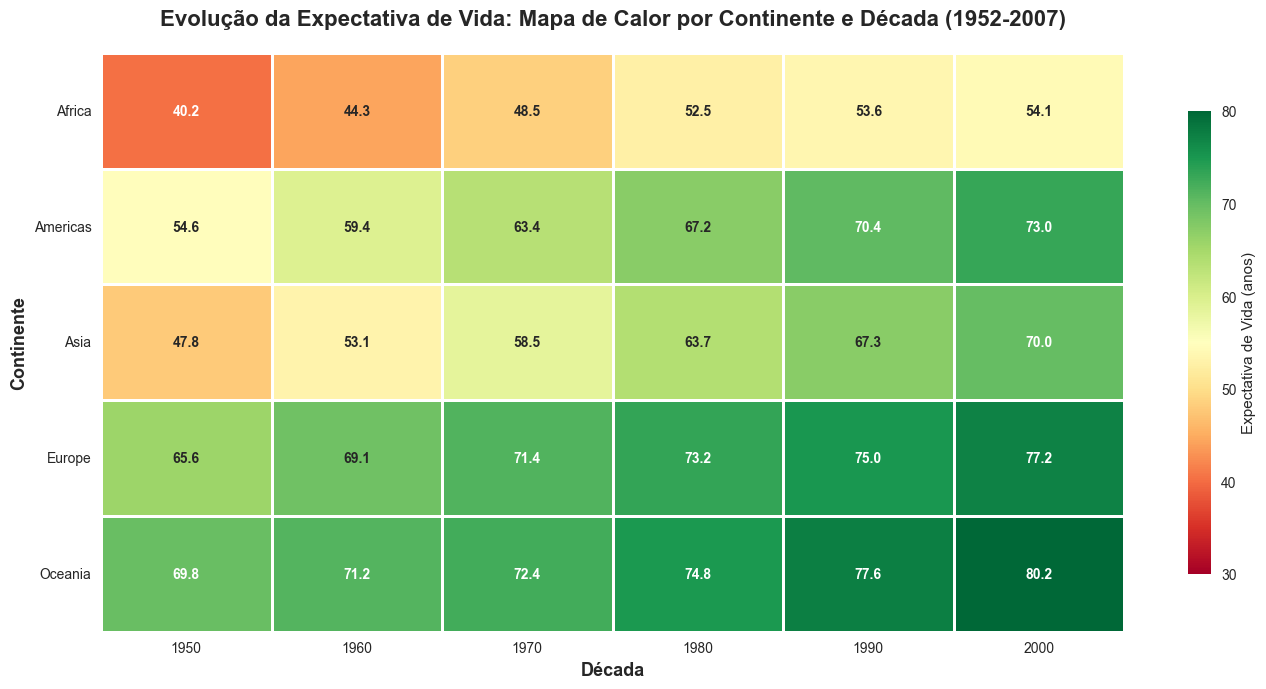

In [ ]:
# Agrupar por continente e década, calculando a média da expectativa de vida
heatmap_data = df.groupby(['continent', 'decade'])['lifeExp'].mean().unstack()

plt.figure(figsize=(14, 7))

# Criar o heatmap com configurações avançadas
ax = sns.heatmap(heatmap_data, 
                 annot=True,
                 fmt='.1f',
                 cmap='RdYlGn',        # Vermelho-Amarelo-Verde (baixo-médio-alto)
                 linewidths=1,
                 linecolor='white',
                 cbar_kws={'label': 'Expectativa de Vida (anos)', 'shrink': 0.8},
                 vmin=30,              # Valor mínimo da escala
                 vmax=80,              # Valor máximo da escala
                 square=False,         # Células retangulares
                 annot_kws={'size': 10, 'weight': 'bold'})

# Configurações adicionais
plt.title('Evolução da Expectativa de Vida: Mapa de Calor por Continente e Década (1952-2007)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Década', fontsize=13, fontweight='bold')
plt.ylabel('Continente', fontsize=13, fontweight='bold')

# Rotacionar labels do eixo X
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


<p align="left">
  <b>Análise Gráfica: Mapa de calor da expectativa de vida por continente e década</b>
</p>

[Visão Geral]

O mapa de calor da expectativa de vida (lifeExp) por continente e década apresenta uma forma visual de compreender como o bem‑estar humano evoluiu ao longo de mais de meio século.

[Análise Entre Continentes]

1. África

O mapa de calor mostra tons ainda frios nas décadas de 1950 e 1960, representando médias de lifeExp inferiores a 40 anos.
A partir da década de 1980 há um claro aquecimento, chegando a faixas em torno de 50 – 55 anos em 2000–2007.
O continente, porém, mantém‑se como o de menor expectativa de vida média em todo o período analisado.

2. Ásia

Na metade do século passado a Ásia exibia faixas intermediárias (~ 38 – 42 anos).
O mapa mostra mudança acentuada para cores quentes após 1970, refletindo rápidos avanços em saúde e infraestrutura.
Em 2007, a maioria dos países asiáticos alcança médias superiores a 70 anos, e regiões como o Japão e o Leste Asiático se aproximam dos níveis europeus.

3. Europa

Desde 1952 o continente europeu já apresenta tons muito quentes, próximos a 70 anos, com uniformidade notável.
As décadas seguintes exibem saturação máxima, indicando valores médios acima de 80 anos em 2007.
O mapa confirma a estabilidade e o predomínio europeu em expectativa de vida ao longo de toda a série histórica.

4. Américas

Os países americanos apresentam coloração intermediária no início (50 – 65 anos) e aquecimento constante até o fim do período.
Em 2007, a maioria das regiões encontra‑se entre 76 e 80 anos, evidenciando expressiva melhoria associada a políticas de saúde pública e expansão urbana.
Ainda assim, o calor do mapa demonstra alguma heterogeneidade, com América do Norte em níveis levemente superiores à América Latina.

5. Oceania

Desde as décadas iniciais o mapa já exibe tons quentes, revelando boas condições de vida.
Os valores médios permanecem altos e continuam a crescer gradualmente até ultrapassar 80 anos em 2007.
O padrão visual é de estabilidade e leve intensificação, muito semelhante ao comportamento europeu.

[Conclusão]

O mapa de calor sintetiza de forma visual o progresso global na longevidade humana entre 1952 e 2007.

A tendência é positiva e quase universal, mas com ritmos distintos:

Europa, Oceania e América do Norte mantêm níveis elevados e constância de melhoria.
Ásia apresenta o mais notável salto de desenvolvimento, aproximando-se gradualmente dos continentes líderes.
África, mesmo avançando, permanece o continente com menor expectativa média, o que reforça a persistência de desigualdades históricas.


In [ ]:
fig = px.choropleth(px.data.gapminder(), 
                    locations="iso_alpha", 
                    color="lifeExp", 
                    hover_name="continent", 
                    animation_frame="year", 
                    range_color=[20 ,80], 
                    title="Animação: Expectativa de Vida por Continente ao Longo dos Anos",
                    width=1200,  
                    height=700)
fig.show()

---

#### Plotagem do Gráfico: População Por Continente vs (Expectativa de Vida vs PIB Per Capita)

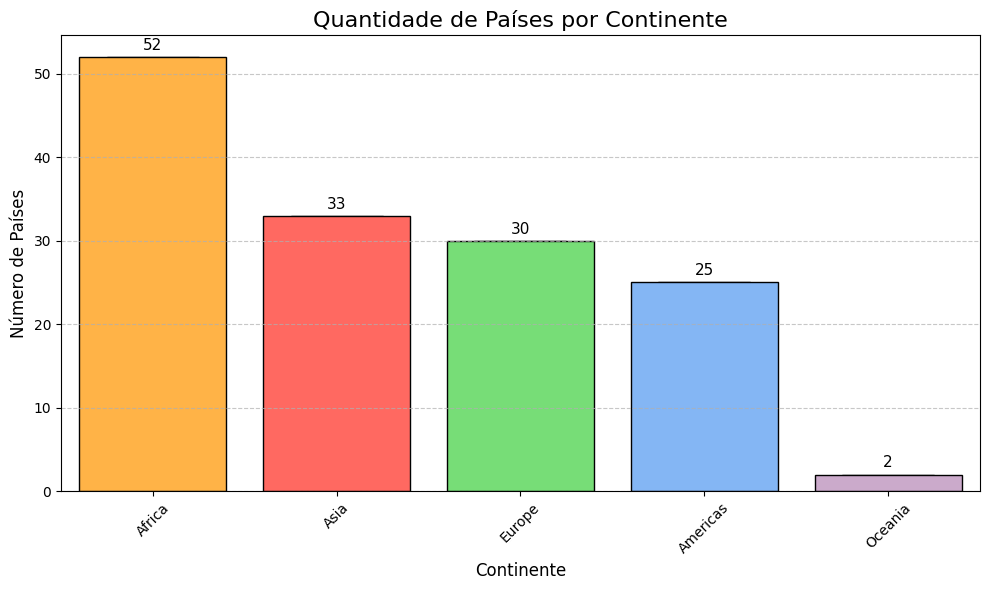

In [ ]:
unique_countries = df[['country', 'continent']].drop_duplicates()

country_counts = unique_countries['continent'].value_counts().sort_values(ascending=False)

colors = {
    'Africa': '#FFB347',
    'Asia': '#FF6961',
    'Europe': '#77DD77',
    'Americas': '#84B6F4',
    'Oceania': '#CBAACB'
}
continent_colors = [colors[continent] for continent in country_counts.index]

fig, ax = plt.subplots(figsize=(10, 6))
country_counts.plot(kind='bar', color=continent_colors, edgecolor='black')
bars = ax.bar(country_counts.index, country_counts.values, color=continent_colors, edgecolor='black')
ax.bar_label(bars, padding=3, fontsize=11)


plt.title("Quantidade de Países por Continente", fontsize=16)
plt.xlabel("Continente", fontsize=12)
plt.ylabel("Número de Países", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [82]:
df = px.data.gapminder().query("year == 2007")

country_counts = df[['country', 'continent']].drop_duplicates()
continent_counts = country_counts['continent'].value_counts().reset_index()
continent_counts.columns = ['continent', 'num_countries']

#Grafico de Pizza
fig = px.pie(
    continent_counts,
    values='num_countries',
    names='continent',
    title='Quantidade de Países por Continente (2007)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

Colentando Média de Expectativa de Vida por Continente e PIB Per Capita Para Analise

In [ ]:
life_expectancy_by_continent = df.groupby("continent")[["lifeExp", "gdpPercap"]].mean().reset_index()
life_expectancy_by_continent.columns = ["Continente", "Expectativa de Vida Média", "PIB per Capita Médio"]
print(life_expectancy_by_continent.sort_values(by="PIB per Capita Médio", ascending=False))

  Continente  Expectativa de Vida Média  PIB per Capita Médio
4    Oceania                  74.326208          18621.609223
3     Europe                  71.983038          14616.642383
2       Asia                  60.091755           7832.764180
1   Americas                  64.700633           7068.785076
0     Africa                  48.768806           2204.913506


#### Análise gráfica: População Por Continente


[Visão Geral]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O gráfico de barras apresenta a quantidade de paises por continente na pesquisa. Torna-se necesário para comparação entre os demais gráficos: PIB Per Capita vs Expectativa de Vida


[Analise Entre Continentes]

| Continente   | Expectativa de Vida | PIB per Capita (médio) | Quantidade de Paises |
| ------------ | ------------------- | ---------------------- | -------------------- |
| **Oceania**  | 74,33 anos          | 18.621                 | 2                    |
| **Europa**   | 71,98 anos          | 14.617                 | 30                   |
| **Américas** | 64,70 anos          | 7.069                  | 25                   |
| **Ásia**     | 60,09 anos          | 7.833                  | 33                   |
| **África**   | 48,77 anos          | 2.205                  | 52                   |

Relação entre População e Desenvolvimento

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ásia e África concentram a maior parte da população mundial, mas não são os mais desenvolvidos economicamente. Por outro lado, Oceania e Europa, com populações menores, têm alto desenvolvimento humano.

[Conclusão]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Alta população não implica alto desenvolvimento. O desenvolvimento está mais ligado à qualidade dos recursos econômicos e sociais, e não à quantidade de habitantes.<br><br>


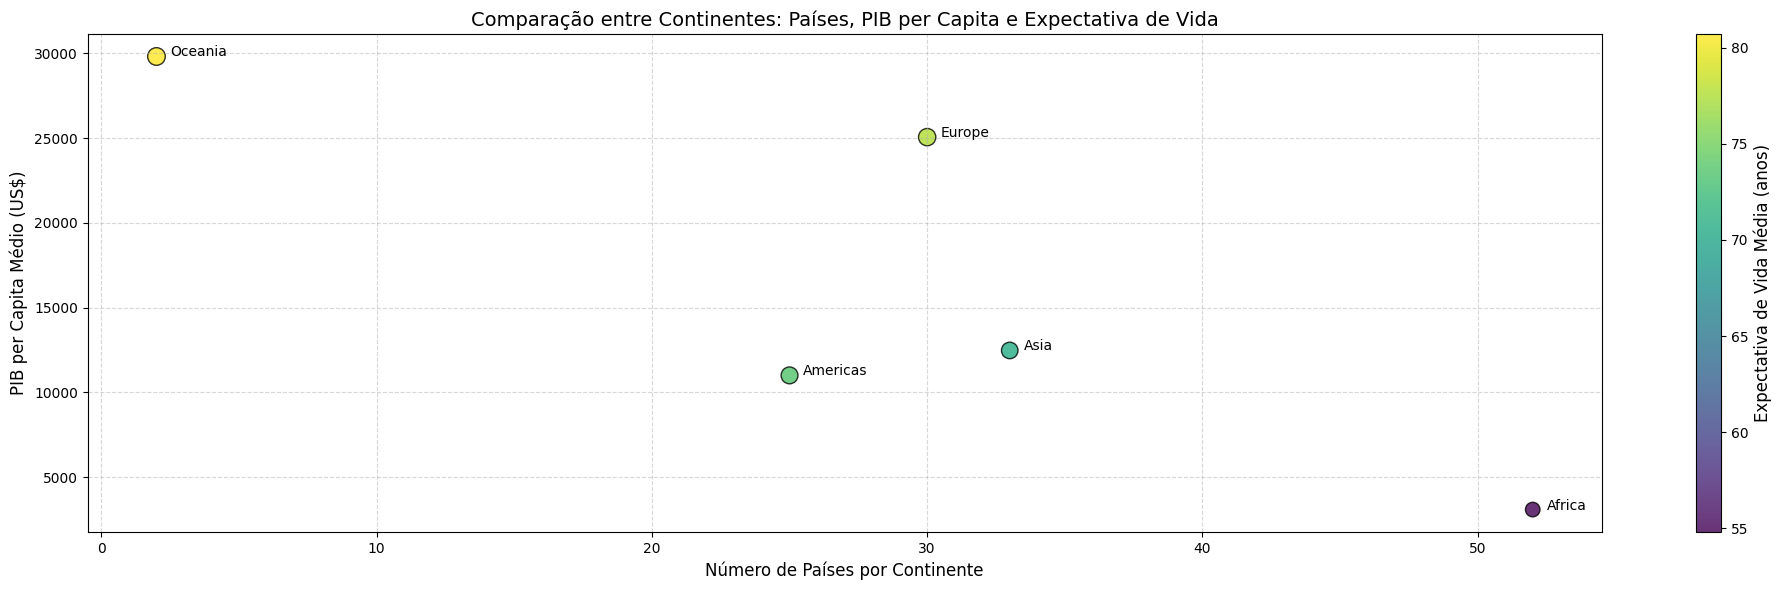

In [ ]:
# Agrupar por país e continente, calcular médias de PIB per capita e expectativa de vida
country_stats = df.groupby(['continent', 'country']).agg({
    'gdpPercap': 'mean',
    'lifeExp': 'mean'
}).reset_index()

# Agrupar por continente para obter médias gerais e número de países
continent_stats = country_stats.groupby('continent').agg({
    'country': 'count',
    'gdpPercap': 'mean',
    'lifeExp': 'mean'
}).rename(columns={'country': 'num_countries'}).reset_index()

# Plotar gráfico de dispersão
fig, ax = plt.subplots(figsize=(20, 6))

scatter = ax.scatter(
    continent_stats['num_countries'],
    continent_stats['gdpPercap'],
    s=continent_stats['lifeExp'] * 2,  
    c=continent_stats['lifeExp'],     
    cmap='viridis',
    alpha=0.8,
    edgecolors='black'
)

# Adicionar rótulos
for i, row in continent_stats.iterrows():
    ax.text(row['num_countries'] + 0.5, row['gdpPercap'], row['continent'], fontsize=10)

# Título e eixos
plt.title("Comparação entre Continentes: Países, PIB per Capita e Expectativa de Vida", fontsize=14)
plt.xlabel("Número de Países por Continente", fontsize=12)
plt.ylabel("PIB per Capita Médio (US$)", fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label("Expectativa de Vida Média (anos)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

[Visão Geral]

O gráfico de dispersão compara três dimensões por continente:
- Eixo X: número de países representados
- Eixo Y: PIB per capita médio
- Tamanho e cor dos pontos: expectativa de vida média
Cada ponto representa um continente, permitindo visualizar como a quantidade de países se relaciona com os indicadores socioeconômicos.

[Análise Comparativa]

| Continente | Nº de Países | PIB per Capita | Expectativa de Vida Média |
|------------|--------------|-----------------------|----------------------------|
| África     | 52           | Baixo                 | Baixa                      |
| Ásia       | 33           | Médio                 | Médio                      |
| Europa     | 30           | Alto                  | Alta                       |
| Américas   | 25           | Médio-alto            | Médio-alto                 |
| Oceania    | 2            | Muito alto            | Muito alta                 |

*   África, com o maior número de países, apresenta os menores valores médios de PIB per capita e expectativa de vida, refletindo desigualdades e desafios estruturais. <br>
• 	Europa e Oceania, apesar de terem menos países, concentram os melhores indicadores. <br>
• 	Ásia e Américas ocupam posições intermediárias, com variações internas significativas <br>


[Conclusão]

A quantidade de países por continente não garante melhores indicadores. Continentes com menos países, como Europa e Oceania, apresentam maior qualidade de vida e renda média. Já África, com muitos países, enfrenta desafios que impactam seus indicadores. Essa análise reforça a importância de considerar não só o volume de países, mas também suas condições socioeconômicas ao interpretar dados globais.



### Plotagem do Gráfico: Paises Mais Populosos do Mundo (Inicio e Final da Pesquisa)

In [ ]:
fig = px.scatter_geo(
    px.data.gapminder(),
    locations="iso_alpha",        
    locationmode='ISO-3',               
    color="continent",
    hover_name="country",
    size="pop",
    animation_frame="year",
    projection="natural earth",
    title='População dos países de 1952-2007',
    width=1200,  
    height=700   
)

fig.show()


#5. Interpretação das Visualizações

# 6 . Conclusão e Reflexão

Desafios Enfrentados<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tratar duplicações e inconsistências no dataset exigiu atenção. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Escolher visualizações que fossem informativas e acessíveis foi um processo iterativo.<br><br>

Aprendizado Obtido<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A análise reforçou a importância de visualizações bem construídas para revelar padrões ocultos.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compreendi como indicadores socioeconômicos se inter-relacionam e como desigualdades persistem.<br><br>

Desenvolvimento de Habilidades<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Aprimorei habilidades em limpeza de dados, visualização e interpretação crítica.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ganhei maior autonomia para construir narrativas analíticas com base em evidências.<br>

